# Análisis de mercado inmobiliario para facilitar la inversión en VFT

**Exploración de los datos de viviendas de uso turístico, recopilados por el portal insideairbnb.com en la ciudad de Madrid en Septiembre de 2021, con el objetivo de generar insights para facilitar la inversión en activos inmobiliarios.**

**El análisis se enriquece con información del precio de mercado en el portal inmobiliario idealista.com y a partir del cual se generan nuevas variables**

#  Importación e inspección 
**Archivos descargados de insideairbnb.com**

   8 archivos en total


In [1]:
# Importacion de librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlalchemy as  sa
import seaborn as sns
%config IPCompleter.greedy = True

In [2]:
# Carga del primer archivo

listings = pd.read_csv('../00_Datos/listings.csv')

In [3]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,80,2019-05-14,1.21,2,180,4,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-05-29,0.39,2,364,0,NaN
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,5,222,0,NaN
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,12,2020-03-01,0.51,1,115,2,NaN
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,2018-05-15,1.65,1,349,0,NaN


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18909 non-null  int64  
 1   name                            18906 non-null  object 
 2   host_id                         18909 non-null  int64  
 3   host_name                       18883 non-null  object 
 4   neighbourhood_group             18909 non-null  object 
 5   neighbourhood                   18909 non-null  object 
 6   latitude                        18909 non-null  float64
 7   longitude                       18909 non-null  float64
 8   room_type                       18909 non-null  object 
 9   price                           18909 non-null  int64  
 10  minimum_nights                  18909 non-null  int64  
 11  number_of_reviews               18909 non-null  int64  
 12  last_review                     

In [5]:
# Carga del segundo archivo

listings_det = pd.read_csv('../00_Datos/listings.csv.gz')

In [6]:
listings_det.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20210910193531,2021-09-11,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,4.89,4.77,4.85,NaN,f,2,0,2,0,1.21
1,21853,https://www.airbnb.com/rooms/21853,20210910193531,2021-09-11,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.39
2,23001,https://www.airbnb.com/rooms/23001,20210910193531,2021-09-11,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,https://www.airbnb.com/users/show/82175,...,NaN,NaN,NaN,NaN,f,5,4,1,0,NaN
3,24805,https://www.airbnb.com/rooms/24805,20210910193531,2021-09-11,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.51
4,26825,https://www.airbnb.com/rooms/26825,20210910193531,2021-09-11,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,...,4.71,4.70,4.72,NaN,f,1,0,1,0,1.65


In [13]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18909 non-null  int64  
 1   listing_url                                   18909 non-null  object 
 2   scrape_id                                     18909 non-null  int64  
 3   last_scraped                                  18909 non-null  object 
 4   name                                          18906 non-null  object 
 5   description                                   17854 non-null  object 
 6   neighborhood_overview                         10997 non-null  object 
 7   picture_url                                   18908 non-null  object 
 8   host_id                                       18909 non-null  int64  
 9   host_url                                      18909 non-null 

In [8]:
# Carga del tercer archivo

reviews = pd.read_csv('../00_Datos/reviews.csv')

In [9]:
reviews.head()

,listing_id,date
0,6369,2010-03-14
1,6369,2010-03-23
2,6369,2010-04-10
3,6369,2010-04-21
4,6369,2010-04-26


In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618440 entries, 0 to 618439
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  618440 non-null  int64 
 1   date        618440 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.4+ MB


In [11]:
# Carga del cuarto archivo

reviews_det = pd.read_csv('../00_Datos/reviews.csv.gz')

In [12]:
reviews_det.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r<br/>It's a w...
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...


In [13]:
reviews_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618440 entries, 0 to 618439
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     618440 non-null  int64 
 1   id             618440 non-null  int64 
 2   date           618440 non-null  object
 3   reviewer_id    618440 non-null  int64 
 4   reviewer_name  618439 non-null  object
 5   comments       618054 non-null  object
dtypes: int64(3), object(3)
memory usage: 28.3+ MB


In [14]:
# Carga del quinto archivo

calendar = pd.read_csv('../00_Datos/calendar.csv')

In [15]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6369,2021-09-11,t,$60.00,$60.00,1.0,1125.0
1,6369,2021-09-12,t,$60.00,$60.00,1.0,1125.0
2,6369,2021-09-13,t,$60.00,$60.00,1.0,1125.0
3,6369,2021-09-14,t,$60.00,$60.00,1.0,1125.0
4,6369,2021-09-15,t,$60.00,$60.00,1.0,1125.0


In [16]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901414 entries, 0 to 6901413
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 368.6+ MB


In [17]:
# Carga del sexto archivo

calendar_det = pd.read_csv('../00_Datos/calendar.csv.gz')

In [19]:
calendar_det.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6369,2021-09-11,t,$60.00,$60.00,1.0,1125.0
1,6369,2021-09-12,t,$60.00,$60.00,1.0,1125.0
2,6369,2021-09-13,t,$60.00,$60.00,1.0,1125.0
3,6369,2021-09-14,t,$60.00,$60.00,1.0,1125.0
4,6369,2021-09-15,t,$60.00,$60.00,1.0,1125.0


In [18]:
calendar_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901414 entries, 0 to 6901413
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 368.6+ MB


In [20]:
# Carga del septimo archivo

neighbourhoods = pd.read_csv('../00_Datos/neighbourhoods.csv')

In [22]:
neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,Arganzuela,Acacias
1,Arganzuela,Atocha
2,Arganzuela,Chopera
3,Arganzuela,Delicias
4,Arganzuela,Imperial


In [21]:
neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  128 non-null    object
 1   neighbourhood        128 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [23]:
# Carga del octavo archivo

neighbourhoods_det = pd.read_json('../00_Datos/neighbourhoods.geojson')

In [24]:
neighbourhoods_det.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [25]:
neighbourhoods_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      128 non-null    object
 1   features  128 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


**CONCLUSIONES TRAS LA CARGA DE DATOS**

Nos quedaremos sólo con los archivos que nos aportan valor para nuestro caso: **listings y listings_det**

# Creación de una BBDD 
**Subiremos los archivos como tablas independientes**

Usaremos ***sqlite***

In [29]:
import sqlalchemy as  sa

con = sa.create_engine('sqlite:///../00_Datos/airbnb.db')

In [30]:
# Creamos las tablas listings y listings_det

listings.to_sql('listings', con = con, if_exists= 'replace')

listings_det.to_sql('listings_det', con = con, if_exists= 'replace')

#  Acceso a la BBDD
**Accederemos desde cero a la BBDD creada e incorporaremos otros datos mediante técnicas de webscrapping**

### Truco 1. Inspeccionar BBDD

In [4]:
# Truco: En caso de que no tengamos la documentación de la BBDD, podemos inspeccionarla

from sqlalchemy import inspect
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['listings', 'listings_det']

In [31]:
# Accedemos a BBDD y creamos nuevamente las tablas. Método manual una a una

listings = pd.read_sql('listings', con)
listings_det = pd.read_sql('listings_det', con)

### Truco 2. Cargar tablas de forma dinámica

In [6]:
# Truco: En caso de querer cargar muchas tablas de forma dinámica con un bucle:

for tabla in tablas:
    exec (f'{tabla} = pd.read_sql(tabla, con)')

In [42]:
#comprobamos la carga correcta de las tablas
listings.shape

(18909, 19)

In [43]:
listings_det.shape

(18909, 75)

### Truco 3. Comprobar con bucle que las tablas están bien cargadas

In [7]:
# Truco: Comprobación masiva de carga de tablas:

for cada in tablas:
    print(cada + ':' + str(eval(cada).shape))

listings:(18909, 19)
listings_det:(18909, 75)


### Truco 4. Usamos extensión navegador Crhome: instant data scrapper
        para descargar datos de precion m2 desde web idealista

In [57]:
# Se hace importacion y seleccion de columnas que necesitamos asi como correccion de nombres
precio_m2 = pd.read_csv('../00_Datos/idealista.csv') \
    .loc[1:, ['table__cell','icon-elbow']] \
    .rename(columns = {'table__cell':'precio_m2','icon-elbow':'distrito'})

precio_m2

,precio_m2,distrito
1,4.085 €/m2,Arganzuela
2,3.409 €/m2,Barajas
3,2.123 €/m2,Carabanchel
4,4.827 €/m2,Centro
5,5.098 €/m2,Chamartín
6,5.381 €/m2,Chamberí
7,2.940 €/m2,Ciudad Lineal
8,3.568 €/m2,Fuencarral
9,3.871 €/m2,Hortaleza
10,2.267 €/m2,Latina


In [58]:
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     object
 1   distrito   21 non-null     object
dtypes: object(2)
memory usage: 468.0+ bytes


In [59]:
# Extraccion de el precio, eliminando caracreres /m2. Extraigo posicion [0] del resultado
# reemplazo el . por nada para que lo interprete como integer. el regex es para evitar caracteres reservados
# correccion tipo object a int

precio_m2.precio_m2 = precio_m2.precio_m2.str.split(expand =  True)[0].str.replace('.','', regex = False).astype(int)
precio_m2

,precio_m2,distrito
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín
6,5381,Chamberí
7,2940,Ciudad Lineal
8,3568,Fuencarral
9,3871,Hortaleza
10,2267,Latina


# Calidad de datos
**Revisamos tabla por tabla y corregimos**

### Tabla listings

In [35]:
listings.head()

,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,2,180
1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2,364
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,5,222
3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1,115
4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1,349


In [13]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           18909 non-null  int64  
 1   id                              18909 non-null  int64  
 2   name                            18906 non-null  object 
 3   host_id                         18909 non-null  int64  
 4   host_name                       18883 non-null  object 
 5   neighbourhood_group             18909 non-null  object 
 6   neighbourhood                   18909 non-null  object 
 7   latitude                        18909 non-null  float64
 8   longitude                       18909 non-null  float64
 9   room_type                       18909 non-null  object 
 10  price                           18909 non-null  int64  
 11  minimum_nights                  18909 non-null  int64  
 12  number_of_reviews               

#### Comprobación de variables que puedan interesar

In [39]:
# Eliminamos variables que no aportan mucho

a_eliminar = ['index',
               'host_name',
               'number_of_reviews',
               'last_review',
               'reviews_per_month',
               'number_of_reviews_ltm',
               'license']

listings.drop(columns = a_eliminar, inplace = True)

In [37]:
listings.head()

,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,2,180
1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2,364
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,5,222
3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1,115
4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1,349


In [40]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17710 entries, 0 to 17709
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           17710 non-null  int64  
 1   id                              17710 non-null  int64  
 2   name                            17707 non-null  object 
 3   host_id                         17710 non-null  int64  
 4   neighbourhood_group             17710 non-null  object 
 5   neighbourhood                   17710 non-null  object 
 6   latitude                        17710 non-null  float64
 7   longitude                       17710 non-null  float64
 8   room_type                       17710 non-null  object 
 9   price                           17710 non-null  int64  
 10  minimum_nights                  17710 non-null  int64  
 11  calculated_host_listings_count  17710 non-null  int64  
 12  availability_365                

#### Corrección tipos de variables

In [41]:
# Corregiremos los tipos de algunas varibles

for variable in ['neighbourhood_group','neighbourhood','room_type']:
    listings[variable] = listings[variable].astype('category')

In [22]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18909 non-null  int64   
 1   name                            18906 non-null  object  
 2   host_id                         18909 non-null  int64   
 3   neighbourhood_group             18909 non-null  category
 4   neighbourhood                   18909 non-null  category
 5   latitude                        18909 non-null  float64 
 6   longitude                       18909 non-null  float64 
 7   room_type                       18909 non-null  category
 8   price                           18909 non-null  int64   
 9   minimum_nights                  18909 non-null  int64   
 10  calculated_host_listings_count  18909 non-null  int64   
 11  availability_365                18909 non-null  int64   
dtypes: category(3), fl

#### Nulos

In [16]:
# Comprobamos Nulos existentes
listings[listings.name.isna()]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
1538,7164589,None,37525983,Centro,Palacio,40.41458,-3.71422,Private room,30,1,1,0
2394,11687495,None,48387429,San Blas - Canillejas,Simancas,40.43765,-3.62672,Entire home/apt,50,1,1,0
2842,13585476,None,20922102,Centro,Universidad,40.42718,-3.71144,Entire home/apt,65,3,1,0


#### Duplicados

In [17]:
# Comprobamos duplicados
listings.duplicated().sum()

0

#### Análisis de variables categoricas

In [18]:
listings.neighbourhood_group.value_counts()

Centro                   8433
Salamanca                1267
Chamberí                 1148
Arganzuela               1070
Tetuán                    811
Carabanchel               669
Retiro                    656
Ciudad Lineal             601
Chamartín                 562
Latina                    547
Puente de Vallecas        542
Moncloa - Aravaca         535
San Blas - Canillejas     485
Hortaleza                 374
Fuencarral - El Pardo     294
Usera                     275
Villaverde                186
Barajas                   147
Moratalaz                 131
Villa de Vallecas         105
Vicálvaro                  71
Name: neighbourhood_group, dtype: int64

In [26]:
listings.neighbourhood.value_counts()

Embajadores    2255
Universidad    1772
Palacio        1533
Sol            1126
Justicia        910
               ... 
El Plantío        5
Valdemarín        4
El Pardo          3
Horcajo           2
Atalaya           1
Name: neighbourhood, Length: 128, dtype: int64

In [27]:
listings.room_type.value_counts()

Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room           163
Name: room_type, dtype: int64

In [28]:
listings.shape

(18909, 12)

In [42]:
# Al encontrar en la variable room_type 163 habitaciones de hotel las quitaremos

listings = listings.loc[listings.room_type != 'Hotel room']

listings.shape

(17710, 13)

#### Análisis de variables numéricas

In [34]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18746 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18746 non-null  int64   
 1   name                            18743 non-null  object  
 2   host_id                         18746 non-null  int64   
 3   neighbourhood_group             18746 non-null  category
 4   neighbourhood                   18746 non-null  category
 5   latitude                        18746 non-null  float64 
 6   longitude                       18746 non-null  float64 
 7   room_type                       18746 non-null  category
 8   price                           18746 non-null  int64   
 9   minimum_nights                  18746 non-null  int64   
 10  calculated_host_listings_count  18746 non-null  int64   
 11  availability_365                18746 non-null  int64   
dtypes: category(3), fl

In [43]:
# Me interesan de la variable 8 en adelante
# añadimos funcion descrive y sacamos la transpuesta
listings.iloc[: , 8: ].describe().T

,count,mean,std,min,25%,50%,75%,max
price,17710.0,135.916714,443.952924,20.0,40.0,68.0,109.0,9999.0
minimum_nights,17710.0,6.668492,34.434498,1.0,1.0,2.0,3.0,1125.0
calculated_host_listings_count,17710.0,10.960192,27.015545,1.0,1.0,2.0,7.0,194.0
availability_365,17710.0,155.941333,139.976960,0.0,0.0,120.0,312.0,365.0


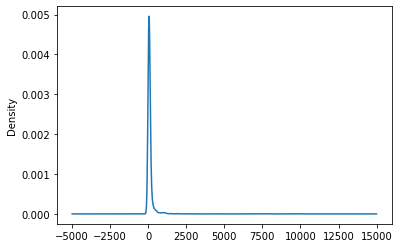

In [44]:
listings.price.plot.kde();

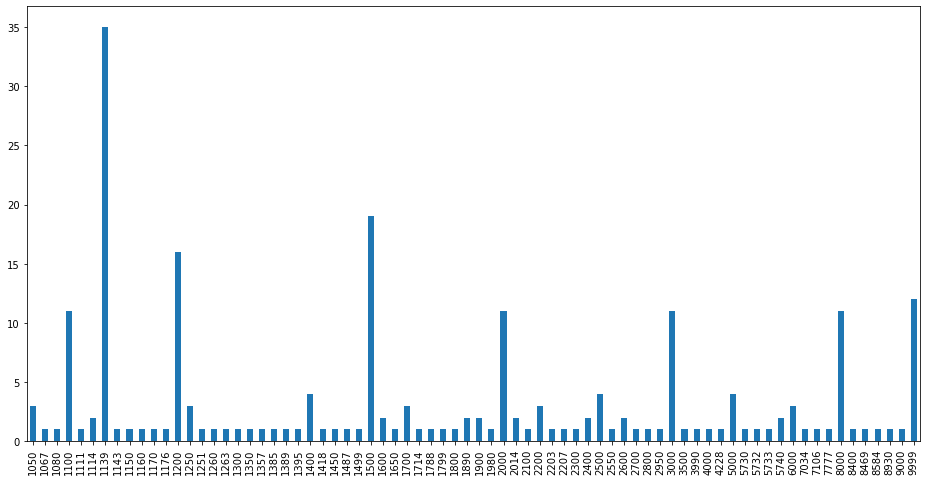

In [47]:
# Hacemos grafico mas grande y zoom en el precio >1000
# el value_counts es para sacar lista ordenada por valores
# el sort_index para ordenar por indice

plt.figure(figsize = (16,8))
listings.price.loc[listings.price > 1000].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);

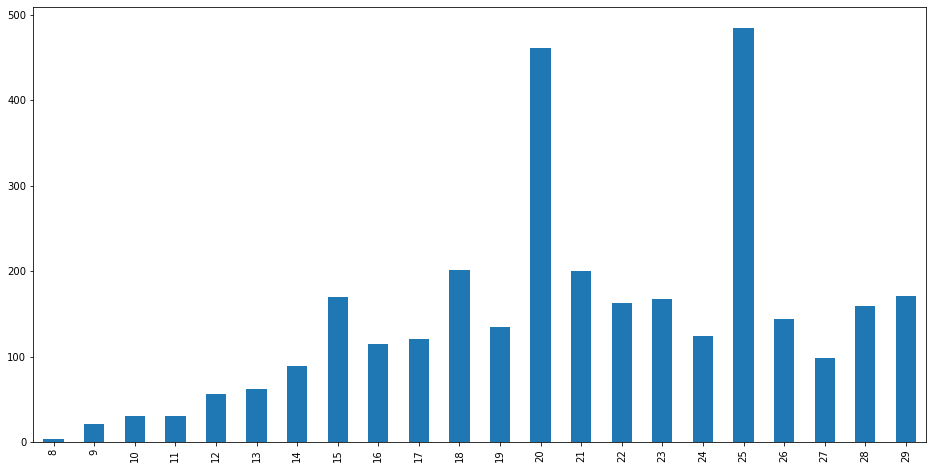

In [48]:
# Hacemos grafico mas grande y zoom en el precio < 30
# el value_counts es para sacar lista ordenada por valores
# el sort_index para ordenar por indice

plt.figure(figsize = (16,8))
listings.price.loc[listings.price < 30].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);

**Conclusion: Filtraremos los registros para tener viviendas que tengan un precio/noche mínimo de 20€ en adelante**

In [44]:
listings = listings.loc[listings.price > 19]
listings

,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,2,180
1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,2,364
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,5,222
3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,1,115
4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,1,349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,18904,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,87,358
17706,18905,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,87,358
17707,18906,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,87,358
17708,18907,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,87,358


### Tabla listings_det

In [51]:
listings_det.head()

,index,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,6369,https://www.airbnb.com/rooms/6369,20210910193531,2021-09-11,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,None,https://a0.muscache.com/pictures/683224/4cc318...,13660,...,4.89,4.77,4.85,None,f,2,0,2,0,1.21
1,1,21853,https://www.airbnb.com/rooms/21853,20210910193531,2021-09-11,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,None,f,2,0,2,0,0.39
2,2,23001,https://www.airbnb.com/rooms/23001,20210910193531,2021-09-11,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,...,NaN,NaN,NaN,None,f,5,4,1,0,NaN
3,3,24805,https://www.airbnb.com/rooms/24805,20210910193531,2021-09-11,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,...,5.00,5.00,4.83,None,f,1,1,0,0,0.51
4,4,26825,https://www.airbnb.com/rooms/26825,20210910193531,2021-09-11,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,...,4.71,4.70,4.72,None,f,1,0,1,0,1.65


In [52]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         18909 non-null  int64  
 1   id                                            18909 non-null  int64  
 2   listing_url                                   18909 non-null  object 
 3   scrape_id                                     18909 non-null  int64  
 4   last_scraped                                  18909 non-null  object 
 5   name                                          18906 non-null  object 
 6   description                                   17854 non-null  object 
 7   neighborhood_overview                         10997 non-null  object 
 8   picture_url                                   18908 non-null  object 
 9   host_id                                       18909 non-null 

#### Comprobación de variables que puedan interesar

In [22]:
# Seleccionamos las variables con las que nos queremos quedar

a_mantener = ['id',
              'description',
              'host_is_superhost',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_communication',
              'review_scores_location']

listings_det = listings_det.loc[:, a_mantener]
listings_det

,id,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,Excellent connection with the AIRPORT and EXHI...,t,2,NaN,1.0,1.0,80,4.87,4.89,4.77
1,21853,We have a quiet and sunny room with a good vie...,f,1,NaN,1.0,1.0,33,4.58,4.82,4.21
2,23001,"Apartamento de tres dormitorios dobles, gran s...",f,6,NaN,3.0,5.0,0,NaN,NaN,NaN
3,24805,"Studio located 50 meters from Gran Via, next t...",f,3,NaN,NaN,1.0,12,4.92,5.00,5.00
4,26825,Nice and cozy roon for one person with a priva...,f,1,NaN,1.0,1.0,149,4.68,4.71,4.70
...,...,...,...,...,...,...,...,...,...,...,...
18904,52182264,ROOM - 8 sqm. • 1st Floor <br /> <br />cozy ro...,f,1,NaN,1.0,0.0,0,NaN,NaN,NaN
18905,52182273,ROOM - 10 sqm. • 4th Floor <br /> <br />cozy r...,f,1,NaN,1.0,0.0,0,NaN,NaN,NaN
18906,52182303,ROOM <br /> <br />cozy room in madrid centro i...,f,1,NaN,1.0,0.0,0,NaN,NaN,NaN
18907,52182321,ROOM -9 sqm. • 1st Floor <br /> <br />cozy roo...,f,1,NaN,1.0,0.0,0,NaN,NaN,NaN


In [55]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18909 non-null  int64  
 1   description                  17854 non-null  object 
 2   host_is_superhost            18883 non-null  object 
 3   accommodates                 18909 non-null  int64  
 4   bathrooms                    0 non-null      float64
 5   bedrooms                     17475 non-null  float64
 6   beds                         18568 non-null  float64
 7   number_of_reviews            18909 non-null  int64  
 8   review_scores_rating         13877 non-null  float64
 9   review_scores_communication  13640 non-null  float64
 10  review_scores_location       13637 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.6+ MB


#### Corrección de tipos de variables

In [23]:
# Corregiremos el tipo de la varible host_is_superhost
listings_det['host_is_superhost'] = listings_det['host_is_superhost'].astype('category')

In [58]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     17475 non-null  float64 
 6   beds                         18568 non-null  float64 
 7   number_of_reviews            18909 non-null  int64   
 8   review_scores_rating         13877 non-null  float64 
 9   review_scores_communication  13640 non-null  float64 
 10  review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 1.5+ MB


#### Nulos

In [59]:
# Comprobamos Nulos existentes
listings_det.isna().sum()

id                                 0
description                     1055
host_is_superhost                 26
accommodates                       0
bathrooms                      18909
bedrooms                        1434
beds                             341
number_of_reviews                  0
review_scores_rating            5032
review_scores_communication     5269
review_scores_location          5272
dtype: int64

##### Proxi para imputar nulos  variable beds

In [61]:
# Haremos una estimacion para imputar los nulos de la variable beds a través de la variable accomodates

pd.crosstab(listings_det.beds, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
0.0,222,259,41,68,15,12,5,3,0,2,0,0,0,0,0,1
1.0,2765,4911,399,639,14,9,0,3,0,2,0,0,0,0,0,9
2.0,120,1110,1016,2277,125,148,3,3,0,1,0,0,1,0,0,1
3.0,18,75,231,925,395,582,18,26,1,1,0,0,0,0,0,0
4.0,20,28,32,216,214,498,73,92,3,9,0,1,0,0,0,0
5.0,2,5,6,20,42,178,75,94,9,30,2,2,0,1,0,0
6.0,14,9,2,5,7,62,21,61,9,18,4,8,2,0,0,0
7.0,0,1,0,2,2,6,10,19,8,17,2,6,1,4,0,0
8.0,3,2,0,0,3,2,0,21,3,18,2,9,2,2,1,0


**CONCLUSION: Cuando el piso acomoda 1 o 2 personas, tiene una cama, cuando acomoda 3 o 4 personas, tiene dos camas, si acomoda a 5 o 6 personas, tiene tres camas, si acomoda mas de 6 personas, tendrá 4 camas**

In [62]:
# Observamos distribución de valores ininial
listings_det.beds.value_counts(dropna = False)

1.0     8751
2.0     4805
3.0     2272
4.0     1186
0.0      628
5.0      466
NaN      341
6.0      222
7.0       78
8.0       68
10.0      39
9.0       20
14.0       6
11.0       6
12.0       5
16.0       5
13.0       4
18.0       2
17.0       2
15.0       1
23.0       1
24.0       1
Name: beds, dtype: int64

In [24]:
# Imputamos nulos variable beds
def imputar_nulos (registro):
    #lista condiciones
    condiciones = [(registro.accommodates <=2),
                   (registro.accommodates > 2) & (registro.accommodates <=4),
                   (registro.accommodates > 4) & (registro.accommodates <=6),
                   (registro.accommodates >=6)]
    
    #lista de resultados
    resultados = [1,2,3,4]
    
    #Salida
    return(np.select(condiciones, resultados, default = -999))

# Aplicamos funcion unicamente a los que son nulos y le asignamos el tipo de variable que tiene accommodates
listings_det.loc[listings_det.beds.isna(), 'beds'] = listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos, axis = 1).astype('int64')

In [68]:
# observamos nuevas imputaciones
listings_det.beds.value_counts(dropna = False)

1.0     9061
2.0     4828
3.0     2276
4.0     1190
0.0      628
5.0      466
6.0      222
7.0       78
8.0       68
10.0      39
9.0       20
14.0       6
11.0       6
12.0       5
16.0       5
13.0       4
18.0       2
17.0       2
15.0       1
23.0       1
24.0       1
Name: beds, dtype: int64

##### Proxi para imputar nulos  variable bedrooms

In [71]:
# Haremos una estimacion para imputar los nulos de la variable bedrooms a través de la variable beds

pd.crosstab(listings_det.bedrooms, listings_det.beds)

beds,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,23.0,24.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
1.0,451,8038,3039,459,139,15,36,1,13,1,...,0,1,0,1,0,0,0,0,0,0
2.0,65,108,1372,1329,532,110,33,7,5,0,...,0,0,0,0,0,0,0,1,0,0
3.0,7,28,22,414,393,242,80,25,11,7,...,2,0,0,0,0,0,0,0,0,0
4.0,6,23,3,7,95,63,56,27,19,6,...,2,2,0,0,0,0,0,0,0,0
5.0,1,14,0,0,2,26,10,16,17,2,...,1,1,2,1,0,2,0,1,0,0
6.0,2,4,0,0,0,0,6,0,2,3,...,0,1,1,0,0,1,1,0,0,0
7.0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,3,1,1,1,0,0,0
8.0,0,3,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


**CONCLUSION: Cuando el piso acomoda 0, 1 o 2 personas, tiene una habitación, cuando acomoda 3 o 4 personas, tiene dos habitaciones, si acomoda a 5 o 6 personas, tiene tres habitaciones, si acomoda mas de 6 personas, tendrá 4 habitaciones**

In [25]:
# Imputamos nulos variable bedrooms
def imputar_nulos (registro):
    #lista condiciones
    condiciones = [(registro.beds <=2),
                   (registro.beds > 2) & (registro.beds <=4),
                   (registro.beds > 4) & (registro.beds <=6),
                   (registro.beds >=6)]
    
    #lista de resultados
    resultados = [1,2,3,4]
    
    #Salida
    return(np.select(condiciones, resultados, default = -999))

# Aplicamos funcion unicamente a los que son nulos y le asignamos el tipo de variable que tiene accommodates
listings_det.loc[listings_det.bedrooms.isna(), 'bedrooms'] = listings_det.loc[listings_det.bedrooms.isna()].apply(imputar_nulos, axis = 1).astype('float64')

In [73]:
# observamos nuevas imputaciones donde desaparecen nulos y varían los valores
listings_det.bedrooms.value_counts(dropna = False)

1.0     13540
2.0      3657
3.0      1244
4.0       311
5.0       105
6.0        24
7.0        11
8.0         7
9.0         3
10.0        3
14.0        2
15.0        1
18.0        1
Name: bedrooms, dtype: int64

#### Duplicados

In [76]:
listings_det.duplicated().sum()

0

#### Análisis de variables categóricas

In [77]:
listings_det.host_is_superhost.value_counts()

f    15423
t     3460
Name: host_is_superhost, dtype: int64

#### Análisis de variables numéricas

In [78]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     18909 non-null  float64 
 6   beds                         18909 non-null  float64 
 7   number_of_reviews            18909 non-null  int64   
 8   review_scores_rating         13877 non-null  float64 
 9   review_scores_communication  13640 non-null  float64 
 10  review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 1.5+ MB


In [79]:
# Filtraremos las variables que necesitamos a través del método describe

listings_det.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
id,18909.0,3.055841e+07,1.448889e+07,6369.0,19305558.00,33537761.00,42555334.00,52182334.0
accommodates,18909.0,3.094928e+00,1.963715e+00,0.0,2.00,2.00,4.00,16.0
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,18909.0,1.414670e+00,8.116969e-01,1.0,1.00,1.00,2.00,18.0
beds,18909.0,1.909197e+00,1.444317e+00,0.0,1.00,1.00,2.00,24.0
number_of_reviews,18909.0,3.270612e+01,6.524996e+01,0.0,0.00,5.00,32.00,744.0
review_scores_rating,13877.0,4.549404e+00,7.834379e-01,0.0,4.50,4.75,4.94,5.0
review_scores_communication,13640.0,4.776612e+00,4.632929e-01,1.0,4.75,4.92,5.00,5.0
review_scores_location,13637.0,4.788151e+00,3.774844e-01,1.0,4.73,4.92,5.00,5.0


In [26]:
# Eliminamos variable bathrooms que no aporta

listings_det.drop(columns = 'bathrooms', inplace = True)

#  Creación de Datamart Analítico
**Integraremos todas las tablas en una final que llamaremos df**

#### Integración de tablas listings y listings_det

In [63]:
# Cruzaremos tablas  mediante clave: id a través de left joins y lo llamaremos df

df = pd.merge(left= listings, right = listings_det, how = 'left', on = 'id')
df

,index_x,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,index_y,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,...,0,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77
1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,...,1,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,...,2,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN
3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,...,3,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00
4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,...,4,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,18904,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,...,18904,ROOM - 8 sqm. • 1st Floor <br /> <br />cozy ro...,f,1,1.0,0.0,0,NaN,NaN,NaN
17706,18905,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,...,18905,ROOM - 10 sqm. • 4th Floor <br /> <br />cozy r...,f,1,1.0,0.0,0,NaN,NaN,NaN
17707,18906,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,...,18906,ROOM <br /> <br />cozy room in madrid centro i...,f,1,1.0,0.0,0,NaN,NaN,NaN
17708,18907,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,...,18907,ROOM -9 sqm. • 1st Floor <br /> <br />cozy roo...,f,1,1.0,0.0,0,NaN,NaN,NaN


#### Integración de tablas df y precio_m2

In [60]:
# Buscamos campo clave para cruzar
precio_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   precio_m2  21 non-null     int32 
 1   distrito   21 non-null     object
dtypes: int32(1), object(1)
memory usage: 384.0+ bytes


In [61]:
precio_m2.distrito.unique()

array(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral', 'Hortaleza', 'Latina',
       'Moncloa', 'Moratalaz', 'Puente de Vallecas', 'Retiro',
       'Salamanca', 'San Blas', 'Tetuán', 'Usera', 'Vicálvaro',
       'Villa de Vallecas', 'Villaverde'], dtype=object)

In [64]:
# obtenemos los valores que tenemos en distrito df
df.neighbourhood_group.unique().categories

Index(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera',
       'Vicálvaro', 'Villa de Vallecas', 'Villaverde'],
      dtype='object')

In [65]:
# Encontramos que los valores compuestos, unidos por un guion no nos permiten cruzar correctamente.
# los corregimos en precio_m2 que es un dataset mas sencillo
# el metodo map, creará nulos cuando no encuentre los valores que vamos a cambiar explicitamente, solucionamos con fillna

precio_m2.distrito = precio_m2.distrito.map({'Fuencarral':'Fuencarral - El Pardo',
                                            'Moncloa':'Moncloa - Aravaca',
                                            'San Blas':'San Blas - Canillejas'})  \
                                            .fillna(precio_m2.distrito)

precio_m2

,precio_m2,distrito
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín
6,5381,Chamberí
7,2940,Ciudad Lineal
8,3568,Fuencarral - El Pardo
9,3871,Hortaleza
10,2267,Latina


In [ ]:
# Hcemos el nuevo cruce, esta vez como los campos clave se llaman diferente usamos left_on y right_on
df = pd.merge(left = df, right = precio_m2, how = 'left', left_on = 'neighbourhood_group', right_on = 'distrito')
df

In [67]:
# una buena práctica tras una unión de tablas es comprobar si se generan nulos

df.precio_m2.isna().sum()

0

#### Guardamos el df como una tabla en la BBDD

In [70]:
df.to_sql('df', con = con, if_exists = 'replace' )

# Preparación de Variables
**CACHE 1: Cargamos tabla df desde cero**

**Generamos nuevas variables a partir de las existentes**

**Recordatorio: Tres palancas desde negocio PRICE, AVAILABILITY_365, PRECIO_INMUEBLE**



In [3]:
# Con el fin de poder acceder desde este punto crearemos la conección nuevamente a la BBDD y cargaremos la tabla df

con = sa.create_engine('sqlite:///../00_Datos/airbnb.db')

df = pd.read_sql('df', con = con)

df.head()


,index,index_x,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín
1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,...,f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela
3,3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,...,f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro
4,4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela


##### Creación de variable: precio_total

###### Observamos si el precio es por alojamiento entero o por habitaciones

In [6]:
# Se da el caso de que la variable room_type da los valores de tres tipos: habitación compartida, privada y alojamiento entero
# Estos valores deben ser estandarizados a uno solo

df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [7]:
# para comprobarlo accederemos a los precios de alojamientos en distrito centro agrupando por room_type

df.loc[df.distrito == 'Centro', :].groupby('room_type').price.mean()

room_type
Entire home/apt    148.859980
Private room        67.131643
Shared room         60.464286
Name: price, dtype: float64

In [8]:
# Se debe estimar que no siempre un piso con habitaciones compartidas están siempre todas ocupadas.
# Por lo que se le hace un factor de ajuste (desde negocio) = 0.7

# Crearemos una función que nos filtre y ajuste el precio

def crear_precio_total(registro):
    if(registro.beds > 1) & ((registro.room_type == 'Private room') | (registro.room_type == 'Shared room')):
        salida = registro.price * registro.beds * 0.7
    else:
        salida = registro.price
    return (salida)

df['precio_total'] = df.apply(crear_precio_total, axis = 1)

In [9]:
# Comprobamos resultado
df[['room_type','price','beds','precio_total']].head(30)

,room_type,price,beds,precio_total
0,Private room,60,1.0,60.0
1,Private room,31,1.0,31.0
2,Entire home/apt,50,5.0,50.0
3,Entire home/apt,92,1.0,92.0
4,Private room,26,1.0,26.0
5,Entire home/apt,85,3.0,85.0
6,Entire home/apt,65,2.0,65.0
7,Entire home/apt,54,1.0,54.0
8,Entire home/apt,1400,3.0,1400.0
9,Entire home/apt,81,2.0,81.0


##### Creación de variable: ocupacion

In [10]:
# Nos basamos en la disponibilidad del piso al año 
df.availability_365.head()

0    180
1    364
2    222
3    115
4    349
Name: availability_365, dtype: int64

In [11]:
# creamos variable en porcentaje
df['ocupacion'] = (((365 - df.availability_365)/365)* 100).astype('int64')
df[['availability_365','ocupacion']].head()

,availability_365,ocupacion
0,180,50
1,364,0
2,222,39
3,115,68
4,349,4


#### Discretizaciones

##### Variable bedrooms

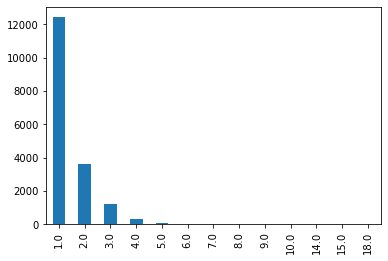

In [12]:
df.bedrooms.value_counts().plot.bar();

In [13]:
# haremos de forma manual la discretización del número de habitaciones

condiciones = [df.bedrooms == 1,
               df.bedrooms == 2,
               df.bedrooms == 3,
               df.bedrooms > 3]

resultados = ['01_Una','02_Dos','03_Tres','04_Cuatro_o_mas']

df['bedroom_disc'] = np.select(condiciones, resultados, default = -999)

In [14]:
#Comprobamos resultados
df['bedroom_disc'].value_counts()

01_Una             12422
02_Dos              3617
03_Tres             1228
04_Cuatro_o_mas      443
Name: bedroom_disc, dtype: int64

##### Variable accommodates

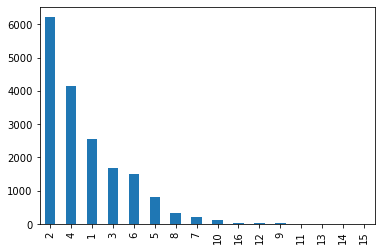

In [17]:
df.accommodates.value_counts().plot.bar();

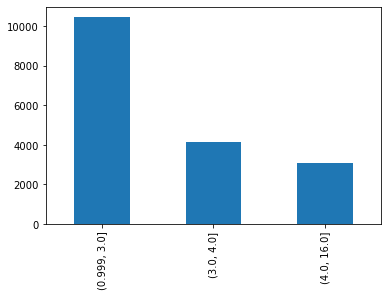

In [20]:
# Creamos cortes que dividan el 50%, el 30% y el 20% de los datos y visualizamos

pd.qcut(df.accommodates, [0,0.5,0.8,1]).value_counts().plot.bar();

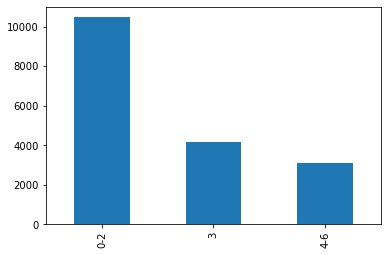

In [26]:
# Los cortes están bien así que mejoramos la salida poniento etiquetas y creamos la variable:

df['accommodates_disc'] = pd.qcut(df.accommodates, [0,0.5,0.8,1],
        labels = ['0-2','3','4-6'])

df['accommodates_disc'].value_counts().plot.bar();
                                     


##### Variable beds

<AxesSubplot:>

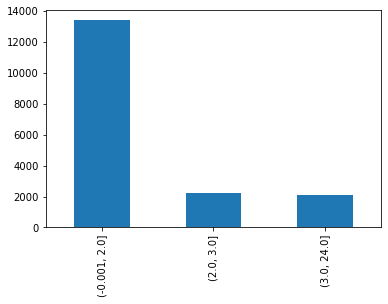

In [28]:
# Creamos cortes que dividan el 50%, el 30% y el 20% de los datos y visualizamos

pd.qcut(df.beds, [0,0.5,0.8,1]).value_counts().plot.bar()

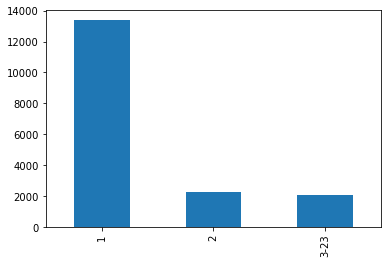

In [29]:
# Los cortes están bien así que mejoramos la salida poniento etiquetas y creamos la variable:

df['beds_disc'] = pd.qcut(df.beds, [0,0.5,0.8,1],
        labels = ['1','2','3-23'])

df['beds_disc'].value_counts().plot.bar();
                                     

##### Variable number of reviews

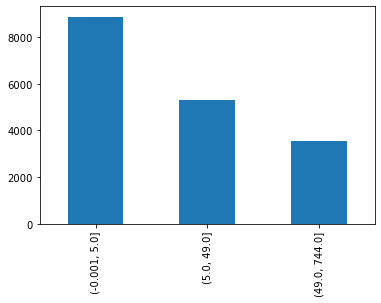

In [30]:
# Creamos cortes que dividan el 50%, el 30% y el 20% de los datos y visualizamos

pd.qcut(df.number_of_reviews, [0,0.5,0.8,1]).value_counts().plot.bar();

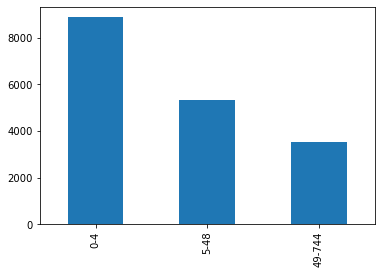

In [32]:
# Los cortes están bien así que mejoramos la salida poniento etiquetas y creamos la variable:

df['number_of_reviews_disc'] = pd.qcut(df.number_of_reviews, [0,0.5,0.8,1],
        labels = ['0-4','5-48','49-744'])

df['number_of_reviews_disc'].value_counts().plot.bar();
                                     

#### Creacion de variables con datos externos

##### Creación de variable m2

In [33]:
# Haremos una asunción basándonos en las características medias de un piso para determinar sus m2

condiciones = [df.bedrooms == 1,
               df.bedrooms == 2,
               df.bedrooms == 3,
               df.bedrooms == 4,
               df.bedrooms > 4]

resultados = [50,70,90,120,150]

df['m2'] = np.select(condiciones, resultados, default = -999)

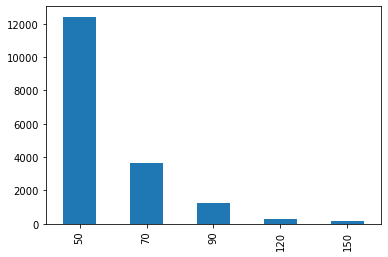

In [35]:
# Comprobamos las salidas

df.m2.value_counts().plot.bar();

##### Creción variable precio_compra

In [36]:
# Teniendo el valor del m2 y el precio_m2 de idealista, asumiremos que podemos negociar para comprarlo un 30% más barato

df['precio_compra'] = df.m2 * df.precio_m2 * 0.7

In [39]:
# Comprobamos la salida con las variables implicadas y las más importantes

df[['bedrooms','m2','distrito','precio_m2','precio_compra']].head(30)

,bedrooms,m2,distrito,precio_m2,precio_compra
0,1.0,50,Chamartín,5098,178430.0
1,1.0,50,Latina,2267,79345.0
2,3.0,90,Arganzuela,4085,257355.0
3,1.0,50,Centro,4827,168945.0
4,1.0,50,Arganzuela,4085,142975.0
5,3.0,90,Arganzuela,4085,257355.0
6,1.0,50,Centro,4827,168945.0
7,1.0,50,Centro,4827,168945.0
8,2.0,70,Centro,4827,236523.0
9,1.0,50,Centro,4827,168945.0


##### Creación de variable distancia a punto de interés

In [42]:
# se aplica la fórmla de distancia de Haversine

from math import radians, cos, sin, asin, sqrt

def haversine (lat1, lon1, lat2, lon2):
    R = 6372.8   #si utilizo millas debo cambiar cantidad por: 3959.87433
    
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    
    return R*c

In [45]:
# Encontramos las variables de ubicación del dataset (latitude, longitude)
df.columns

Index(['index', 'index_x', 'id', 'name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'calculated_host_listings_count', 'availability_365',
       'index_y', 'description', 'host_is_superhost', 'accommodates',
       'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating',
       'review_scores_communication', 'review_scores_location', 'precio_m2',
       'distrito', 'precio_total', 'ocupacion', 'bedroom_disc',
       'df.accommodates_disc', 'accommodates_disc', 'beds_disc',
       'number_of_reviews_disc', 'm2', 'precio_compra'],
      dtype='object')

In [47]:
# Se utilizará la Puerta del Sol como punto de interés (aplicable a cualquier lugar)

lat1 = 40.4167278
lon1 = -3.7033387

df['pdi_sol'] = df.apply(lambda registro: haversine(lat1, lon1, registro.latitude, registro.longitude), axis = 1)

In [51]:
# Comprobamos su eficacia comparando distancia de pdi_sol a cada distrito
# ordenamos por valores

df.groupby('distrito').pdi_sol.mean().sort_values()

distrito
Centro                    0.730611
Arganzuela                1.939114
Chamberí                  2.133167
Retiro                    2.450593
Salamanca                 2.715975
Moncloa - Aravaca         3.294526
Usera                     3.928874
Latina                    3.942634
Carabanchel               3.970238
Chamartín                 4.432842
Puente de Vallecas        4.481127
Tetuán                    4.624605
Moratalaz                 5.073901
Ciudad Lineal             5.231293
Villaverde                7.664192
Fuencarral - El Pardo     8.062301
Hortaleza                 8.074184
San Blas - Canillejas     8.199011
Vicálvaro                 8.599559
Villa de Vallecas         9.176618
Barajas                  11.439064
Name: pdi_sol, dtype: float64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17710 entries, 0 to 17709
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   index                           17710 non-null  int64   
 1   index_x                         17710 non-null  int64   
 2   id                              17710 non-null  int64   
 3   name                            17707 non-null  object  
 4   host_id                         17710 non-null  int64   
 5   neighbourhood_group             17710 non-null  object  
 6   neighbourhood                   17710 non-null  object  
 7   latitude                        17710 non-null  float64 
 8   longitude                       17710 non-null  float64 
 9   room_type                       17710 non-null  object  
 10  price                           17710 non-null  int64   
 11  minimum_nights                  17710 non-null  int64   
 12  calculated_host_li

##### Guadamos df con sus nuevas variables en la BBDD

In [56]:
df.to_sql('df_preparado', con = con, if_exists = 'replace')

# Fase de  Análisis 
**CACHE 2: Cargamos tabla df_preparado desde cero**

In [2]:
# Iniciamos con la conección a la BBDD y la carga de df_preparado

con = sa.create_engine('sqlite:///../00_Datos/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

df.head()


,level_0,index,index_x,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,...,precio_total,ocupacion,bedroom_disc,df.accommodates_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
0,0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,...,60.0,50,01_Una,0-2,0-2,1,49-744,50,178430.0,5.032039
1,1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,...,31.0,0,01_Una,0-2,0-2,1,5-48,50,79345.0,3.521406
2,2,2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,...,50.0,39,03_Tres,4-6,4-6,3-23,0-4,90,257355.0,3.226963
3,3,3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,...,92.0,68,01_Una,0-2,0-2,1,5-48,50,168945.0,0.591065
4,4,4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,...,26.0,4,01_Una,0-2,0-2,1,49-744,50,142975.0,3.200942


In [3]:
# Comenzamos el análisis de la variable Precio_total

df.precio_total.describe()

count    17710.000000
mean       149.027770
std        523.211567
min         20.000000
25%         43.000000
50%         70.000000
75%        112.000000
max      22400.000000
Name: precio_total, dtype: float64

In [4]:
# Obtenemos media muy alta para el precio medio noche y obtenery valores máximos muy altos
# es probable que existan atípicos, nos centramos en la MEDIANA

# Diferenciamos por distritos

df.groupby('distrito').precio_total.median().sort_values(ascending = False)

distrito
San Blas - Canillejas    90.0
Salamanca                88.0
Centro                   76.0
Chamartín                74.0
Chamberí                 70.0
Hortaleza                69.0
Retiro                   68.0
Tetuán                   66.0
Moncloa - Aravaca        61.0
Fuencarral - El Pardo    60.0
Arganzuela               58.0
Vicálvaro                53.0
Ciudad Lineal            50.0
Barajas                  49.5
Carabanchel              48.0
Villa de Vallecas        47.5
Latina                   47.0
Usera                    42.0
Villaverde               42.0
Moratalaz                40.0
Puente de Vallecas       40.0
Name: precio_total, dtype: float64

In [5]:
# observamos valores extraños en el barrio de San Blás, que no es turístico y el alquiler es muy alto
# revisamos los datos

df.loc[df.distrito == 'San Blas - Canillejas'].sort_values('precio_total', ascending = False).head()

,level_0,index,index_x,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,...,precio_total,ocupacion,bedroom_disc,df.accommodates_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
9290,9290,9290,9890,34600594,3 rooms near Wanda,38951538,San Blas - Canillejas,Arcos,40.42105,-3.61457,...,9800.0,100,03_Tres,4-6,4-6,3-23,0-4,90,163233.0,7.532233
9662,9662,9662,10268,34826962,Pozos rooms,222068421,San Blas - Canillejas,Arcos,40.41927,-3.61555,...,6300.0,75,02_Dos,3,3,2,0-4,70,126959.0,7.439364
10189,10189,10189,10800,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,143732655,San Blas - Canillejas,Canillejas,40.44937,-3.61633,...,6000.0,0,04_Cuatro_o_mas,4-6,4-6,3-23,0-4,120,217644.0,8.212429
9668,9668,9668,10274,34833756,Wanda Champions Final,29628177,San Blas - Canillejas,Rosas,40.42622,-3.60502,...,5670.0,100,02_Dos,4-6,4-6,2,0-4,70,126959.0,8.391922
9878,9878,9878,10486,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,263474389,San Blas - Canillejas,Arcos,40.41920,-3.61229,...,4480.0,75,04_Cuatro_o_mas,4-6,4-6,3-23,0-4,150,272055.0,7.714952


#### Conclusión: Obtenemos un primer insight

**Estudiados los valores con detenimiento, observamos que los precios en el barrio de San Blas, han tenido valores significativamente altos, dada su cercanñia al estadio de fútbol Wanda Metropolitano y la final de la Champions League**

**Esto siguere valorar nuevas oportunidades de negocio, que por ejemplo, mezclen alquileres tradicionales con otros de forma puntual para eventos culurales**

In [6]:
# Seguimos investigando las diferencias entre precios y distritos
# Nos centramos en la similitud en precio/noche de Tetuan y Retiro, siendo distritos a piori con precio/compra muy diferenciados

temp = df.groupby('distrito')[['precio_total', 'precio_compra']].median()
temp

,precio_total,precio_compra
distrito,,
Arganzuela,58.0,142975.0
Barajas,49.5,119315.0
Carabanchel,48.0,74305.0
Centro,76.0,168945.0
Chamartín,74.0,178430.0
Chamberí,70.0,188335.0
Ciudad Lineal,50.0,102900.0
Fuencarral - El Pardo,60.0,124880.0
Hortaleza,69.0,135485.0


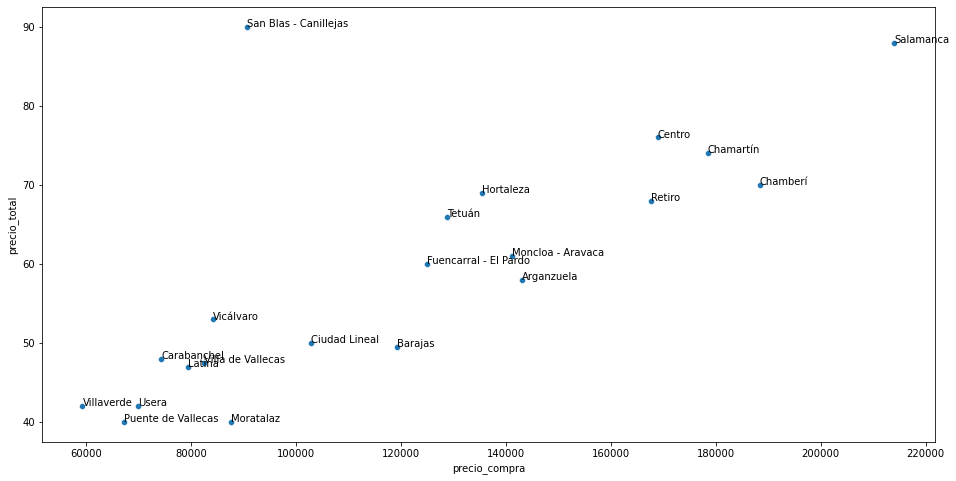

In [7]:
# Esto sugiere una comparación visual global para encontrar otras posibles relaciones
# Realizamos scatterplot con etiquetas de distritos

plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')

for cada in range(0, temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada]);

In [8]:
# Encontramos una relacion directa entre precio total y preciode compra, así como la aparición de tres segmentos de viviendas
# Segmento 1: de 60k a 120k, segmento 2: de 121k a 160k, segmento 3: 161k a 200k
# Bajamos el nivel de análsis pero por barrio

temp = df.groupby('neighbourhood')[['precio_total', 'precio_compra']].median()
temp

,precio_total,precio_compra
neighbourhood,,
Abrantes,35.5,74305.0
Acacias,53.8,142975.0
Adelfas,54.0,234612.0
Aeropuerto,41.3,119315.0
Aguilas,47.0,79345.0
...,...,...
Valverde,62.5,124880.0
Ventas,42.0,102900.0
Vinateros,50.0,87500.0


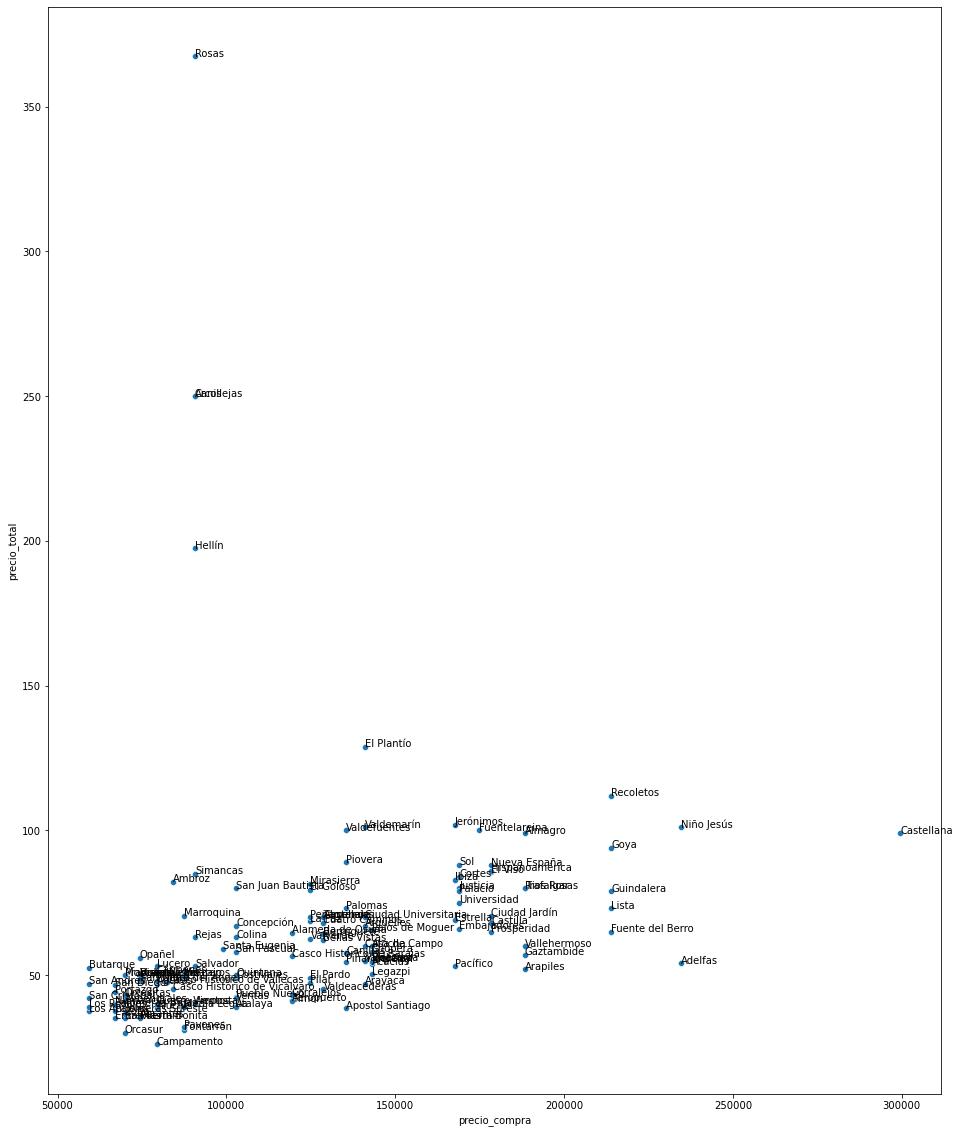

In [9]:
# Realizamos scatterplot con etiquetas de barrios

plt.figure(figsize = (16,20))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')

for cada in range(0, temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada]);

#### Conclusión: Obtenemos un segundo insight

**Analizando el gráfico, podemos identificar barrios que sí pueden ser de interés para una inversión en los tres segmentos encontrados anteriormente**

**Principalmente descacaríamos los que generan mayor precio total entre la masa**

Por ejemplo:

Segmento 1: Ambroz, Simancas, San Juan Bautista

Segmento 2: El Plantío, Valdemarín, Valdefuentes, Piovera, Jerónimos, Fuentelareina

Segmento 3: Almagro, Recoletos, Goya

In [10]:
# Ahora buscaremos información que nos puedan aportar las variables discretizadas para continuar con el análisis

df.filter(like = '_disc')

,bedroom_disc,df.accommodates_disc,accommodates_disc,beds_disc,number_of_reviews_disc
0,01_Una,0-2,0-2,1,49-744
1,01_Una,0-2,0-2,1,5-48
2,03_Tres,4-6,4-6,3-23,0-4
3,01_Una,0-2,0-2,1,5-48
4,01_Una,0-2,0-2,1,49-744
...,...,...,...,...,...
17705,01_Una,0-2,0-2,1,0-4
17706,01_Una,0-2,0-2,1,0-4
17707,01_Una,0-2,0-2,1,0-4
17708,01_Una,0-2,0-2,1,0-4


In [11]:
# Haremos uso de un minicubo para cruzar todas las variables en un sólo análisis

#seleccionamos variables 
metricas = ['precio_total','precio_compra']

dimensiones = ['bedroom_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]


In [12]:
#pasamos a formato transaccional
minicubo_precio = minicubo_precio.melt(id_vars = ['precio_total','precio_compra'])
minicubo_precio

,precio_total,precio_compra,variable,value
0,60.0,178430.0,bedroom_disc,01_Una
1,31.0,79345.0,bedroom_disc,01_Una
2,50.0,257355.0,bedroom_disc,03_Tres
3,92.0,168945.0,bedroom_disc,01_Una
4,26.0,142975.0,bedroom_disc,01_Una
...,...,...,...,...
70835,29.0,168945.0,number_of_reviews_disc,0-4
70836,29.0,168945.0,number_of_reviews_disc,0-4
70837,29.0,168945.0,number_of_reviews_disc,0-4
70838,29.0,213990.0,number_of_reviews_disc,0-4


In [13]:
#Ahora hacemos la agregación por las métricas que acabamos de crear. En nuestro caso seguimos analizando con la Mediana

minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')
minicubo_precio

precio_total  precio_compra
variable               value                                       
accommodates_disc      0-2                      50.0       168945.0
                       3                        86.0       168945.0
                       4-6                     126.0       236523.0
bedroom_disc           01_Una                   56.0       168945.0
                       02_Dos                  100.0       236523.0
                       03_Tres                 140.0       304101.0
                       04_Cuatro_o_mas         204.0       405468.0
beds_disc              1                        59.0       168945.0
                       2                       100.0       236523.0
                       3-23                    139.0       257355.0
number_of_reviews_disc 0-4                      70.0       168945.0
                       49-744                   68.0       168945.0
                       5-48                     69.0       168945.0

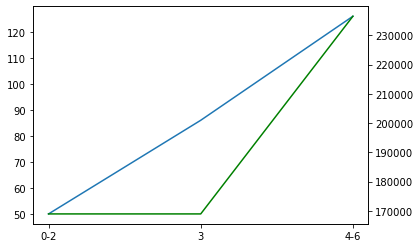

In [14]:
#Una mejor manera de detectar posibles patrones es de forma visual, aunque el minicubo sea pequeño y presente toda la información.
#Es importante destacar que los valores de precio_total y precio_compra están en diferente escala, por lo cual el gráfico debe tener ambas escalas

#Analizamos accommodates_disc:

f,ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra, color = 'green');


In [15]:
#Observación tras la visualización:
# El número óptimo de huéspedes está en 3. Pueden ser inmbuebles de 1 habitación con cama supletoria o sofá que maximicen su rentabilidad.

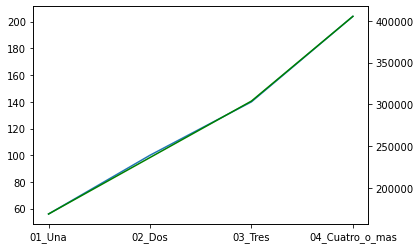

In [16]:
#Analizamos bedroom_disc:

f,ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedroom_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedroom_disc'].precio_compra, color = 'green');


In [17]:
#Observación tras la visualización:
#Importante destacar que estas variables están muy relacionadas entre sí porque se ha construido una en función de la otra.

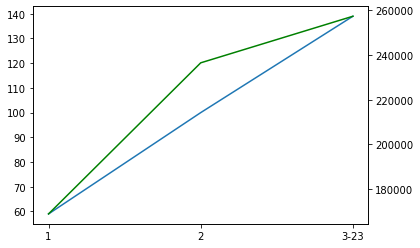

In [18]:
#Analizamos beds_disc:

f,ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra, color = 'green');

In [19]:
#Observación tras la visualización:
# Es interesante invertir en alojamientos que tengan 1 cama ó algúno de 3 o más camas.
# Existe un rango extraño que incluye hasta 23 camas. Buscaremos en detalle

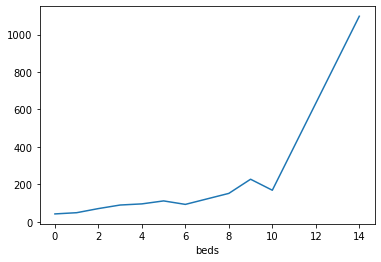

In [20]:
df[df.bedrooms==1].groupby('beds').precio_total.median().plot();

In [21]:
#Observación tras la visualización:
# Puede suceder que existan alojamientos habilitados para celebraciones, por ello proporcionan ese gran número de camas y su precio se incrementa de forma exponencial.

#### Conclusión: Obtenemos un tercer y cuarto insight

**El número óptimo de huéspedes está en 3**

**Es interesante invertir en alojamientos que tengan 1 cama ó algúno de 3 o más camas.**

In [22]:
# Ahora nos centraremos el el impacto de la cercanía a un lugar de interés. PDI. (La Puerta del Sol)
df.groupby('distrito').pdi_sol.median().sort_values()

distrito
Centro                    0.728581
Arganzuela                1.817840
Chamberí                  2.078790
Moncloa - Aravaca         2.130135
Retiro                    2.415432
Salamanca                 2.705209
Latina                    3.496952
Carabanchel               3.647956
Usera                     3.661376
Chamartín                 4.233216
Puente de Vallecas        4.233631
Tetuán                    4.572866
Ciudad Lineal             5.170226
Moratalaz                 5.242395
Villaverde                7.579665
Fuencarral - El Pardo     7.738933
San Blas - Canillejas     7.962141
Hortaleza                 8.132864
Vicálvaro                 8.396723
Villa de Vallecas         8.822907
Barajas                  11.593340
Name: pdi_sol, dtype: float64

In [23]:
# Nos quedaremos con los más viables 'desde negocio' seleccionando una lista de distritos
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()
seleccion

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

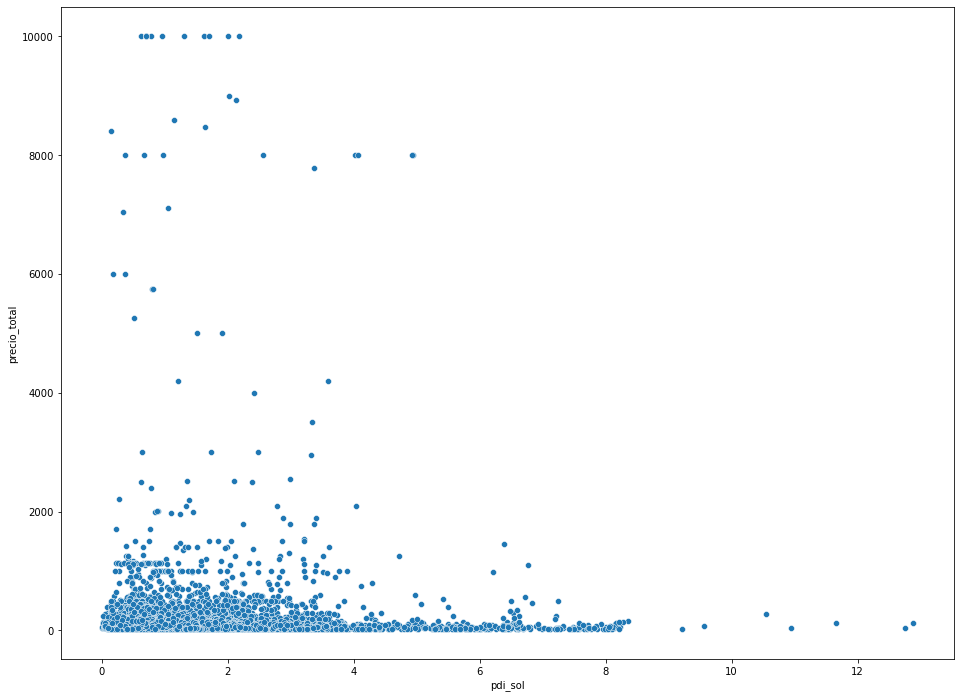

In [24]:
#Visualizamos:
plt.subplots(figsize = (16,12))
sns.scatterplot(data=df.loc[df.distrito.isin(seleccion)], x= 'pdi_sol', y='precio_total');

In [25]:
#Observaciones tras la visualización:
#No existen relaciones directas entre la cercanía a un punto tan concreto como la Puerta del Sol y el valor al cual se puede alquilar.
#Existen inmuebles más alejados que pueden ser más viables para su compra sin tener que tener tanta cercanía.

In [26]:
# Ahora nos centraremos en visualizar aquellos barrios perifericos que pueden ser de interés para otras vías de negocio.
# Trabajaremos con un mapa en distrito de San Blas, donde tenía especial interés la cercanía al estadio Wanda Metropolitano.

import folium
folium.Map(location = [40.4167278,-3.7033387], zoom_start = 12)


In [27]:
#Obtenemos una copia del df, pero sólo con los datos del distrito de San Blas.
datos = df[df.distrito=='San Blas - Canillejas'].copy()
datos

,level_0,index,index_x,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,...,precio_total,ocupacion,bedroom_disc,df.accommodates_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
141,141,141,144,479718,Wanda Stadium. Madrid. 20 minutes from Sol by ...,2376402,San Blas - Canillejas,Rosas,40.432020,-3.603530,...,36.0,69,01_Una,0-2,0-2,1,5-48,50,90685.0,8.620512
152,152,152,156,518208,LOVELY ORANGE ROOM & NEAR WANDA´S STAADIUM,2536524,San Blas - Canillejas,Arcos,40.427560,-3.615770,...,29.4,27,01_Una,0-2,0-2,1,5-48,50,90685.0,7.512148
247,247,247,256,755535,LOVELY ROOM & NEAR WANDA´S STADIUM,2536524,San Blas - Canillejas,Arcos,40.427610,-3.615800,...,29.4,99,01_Una,0-2,0-2,1,5-48,50,90685.0,7.510532
250,250,250,259,758670,LOVELY ROOM & NEAR WANDA´S STADIUM,2536524,San Blas - Canillejas,Arcos,40.426700,-3.616310,...,21.0,28,01_Una,0-2,0-2,1,5-48,50,90685.0,7.452229
253,253,253,262,761095,Compostela Suites Madrid Airport / 2BD,4012305,San Blas - Canillejas,Rejas,40.447910,-3.579180,...,85.0,0,02_Dos,0-2,0-2,1,5-48,70,126959.0,11.068977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17339,17339,17339,18508,51602462,🌟Habitación Wanda,11769281,San Blas - Canillejas,Canillejas,40.436886,-3.608566,...,32.0,7,01_Una,0-2,0-2,1,0-4,50,90685.0,8.331702
17554,17554,17554,18742,51906548,"Loft Deluxe , apartamento oficina , Ciudad Li...",54623373,San Blas - Canillejas,Simancas,40.434867,-3.633209,...,45.0,7,01_Una,3,3,1,0-4,50,90685.0,6.271326
17628,17628,17628,18824,52083353,🌟 Habitación cerca del aeropuerto,11769281,San Blas - Canillejas,Canillejas,40.436899,-3.611810,...,29.0,0,01_Una,0-2,0-2,1,0-4,50,90685.0,8.067943
17634,17634,17634,18830,52089835,Pequeña pero confortable,304292190,San Blas - Canillejas,Rosas,40.426300,-3.609220,...,23.0,0,01_Una,0-2,0-2,1,0-4,50,90685.0,8.040401


In [28]:
#Ahora ponemos la ubicación de cada alojamiento en el mapa
mapa = folium.Map(location = [40.4167278,-3.7033387], zoom_start = 12)

for piso in range(0, len(datos)):
    folium.Marker(
            location =[datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
            popup =datos.iloc[piso]['precio_total']).add_to(mapa)
    
mapa

In [42]:
# Ahora vamos a discretizar los alojamientos ubicados, pero en función de su precio, para posteriormente asociarles un color.

datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, 0.25, 0.5, 0.75, 1],
       labels =['lime','green','orange','orangered'])

#Verde claro equivale a los más económicos y rojo los más caros

In [44]:
# Creamos nuevamente el mapa, pero cambiando el tipo de marcador:

mapa = folium.Map(location = [40.4167278,-3.7033387], zoom_start = 12)

for piso in range(0, len(datos)):
    folium.CircleMarker(
            location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
            popup = datos.iloc[piso]['precio_total'],
            fill = True,
            color = datos.iloc[piso]['precio_total_disc'],
            fill_opacity = 0.4, 
            radius = 5).add_to(mapa)
    
mapa

# Comunicación y resultados

## Contexto del análisis

La empresa ha seleccionado la ciudad de Madrid como candidata para buscar inmuebles en los que invertir con el objetivo de obtener rentabilidad mediante alquiler turístico.

Para ello, antes de poner al equipo de valoraciones a buscar oportunidades, la dirección ha encargado al equipo de Data Science un análisis de Discovery que permita identificar estrategias o líneas de trabajo que ayuden a dirigir la actuación del equipo de valoraciones.

## Objetivos

Analizar las fuentes de datos públicas disponibles
Para encontrar insights que ayuden a entender las características del mercado en esta ciudad
Y guíen el trabajo de búsqueda del equipo de valoraciones
Especialmente en cuanto a los principales ejes: precio del alquiler, niveles de ocupación y precio de compra

## Conclusiones ejecutivas

* Se han localizado 10 barrios en los que centrar la búsqueda
* Se recomienda buscar inmuebles con un habitación que permitan alojar 3 huéspedes
* Se recomienda buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés
* Se recomienda evaluar el desarrollo de un nuevo producto basado en el alquier para momentos concretos de alto interés deportivo, especialmente en el barrio de San Blas

## Detalles de los principales resultados

### Existen 10 barrios con alto potencial de inversión¶

* Se han localizado 10 barrios que apriori pueden maximizar la relación coste-ingresos
* Además podemos segmentarlos por el tipo calidad del inmueble en el que nos interes invertir en 4 grandes grupos
* Estos son los 10 barrios donde comenzar a buscar oportunidades concretas:
    * Inversión baja: Simancas, Ambroz, Marroquina, San Juan Bautista
    * Inversión media: El Plantio, Valdemarín, Valdefuentes
    * Inversión media-alta: Jerónimos, Fuentela reina
    * Inversión alta: Recoletos

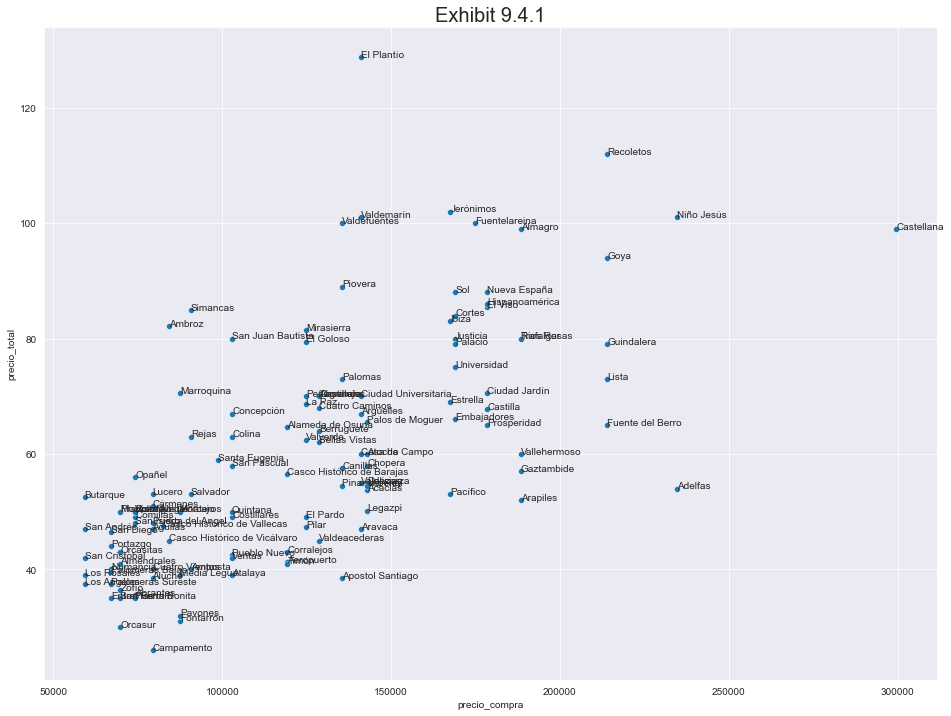

In [50]:
no_incluir = ['Rosas','Arcos','Canillejas','Hellín']

temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()

temp = temp[~temp.index.isin(no_incluir)]

plt.figure(figsize = (16,12))
plt.title('Exhibit 9.4.1', fontsize = 20)
sns.set_style('darkgrid')
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')

#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])
    

### Buscar inmuebles de una habitación que permitan 3 huéspedes
* El número de huéspedes que maximiza el precio de compra pagado es de 3

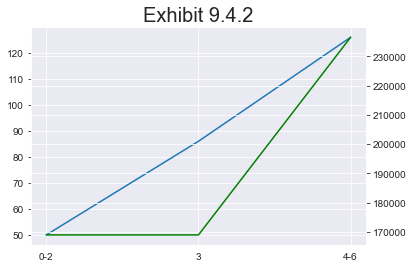

In [55]:
f, ax = plt.subplots()
plt.title('Exhibit 9.4.2', fontsize = 20)
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green');

### Buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés
* Previsiblemente tendrán menor precio de compra
* Parece que la cercanía a puntos de interés no tiene un especial impacto sobre el precio del alquiler

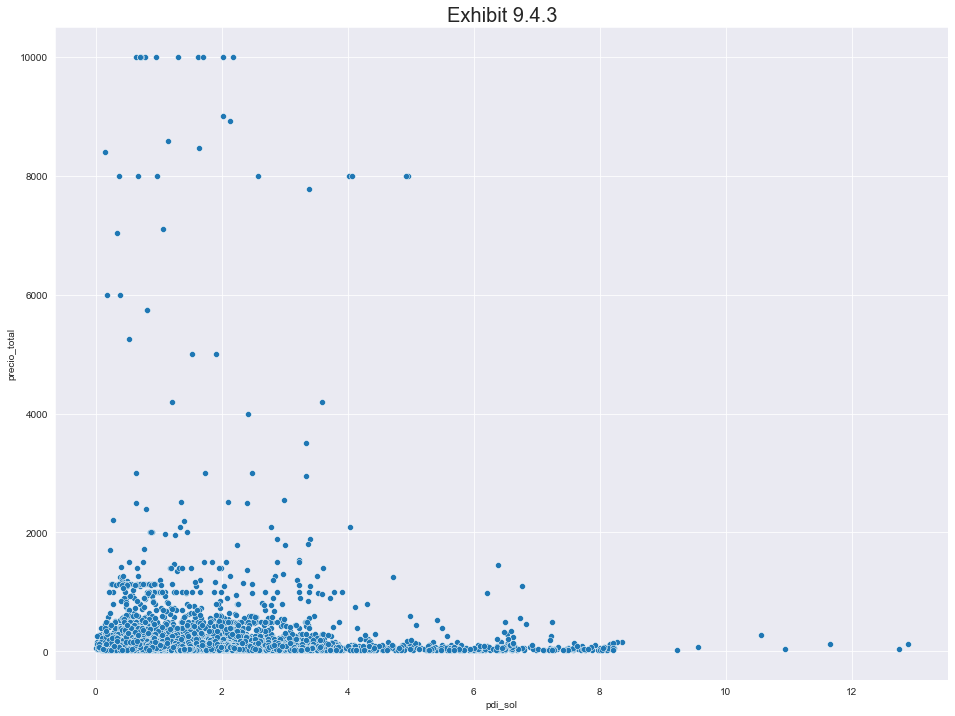

In [56]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
plt.title('Exhibit 9.4.3', fontsize = 20)
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

### Evaluar el desarrollo de un nuevo producto basado en el alquier para momentos concretos de alto interés deportivo
* Buscar oportunidades en el barrio de San Blas
* Todavía existen muchos alquileres que no están explotando este potencial

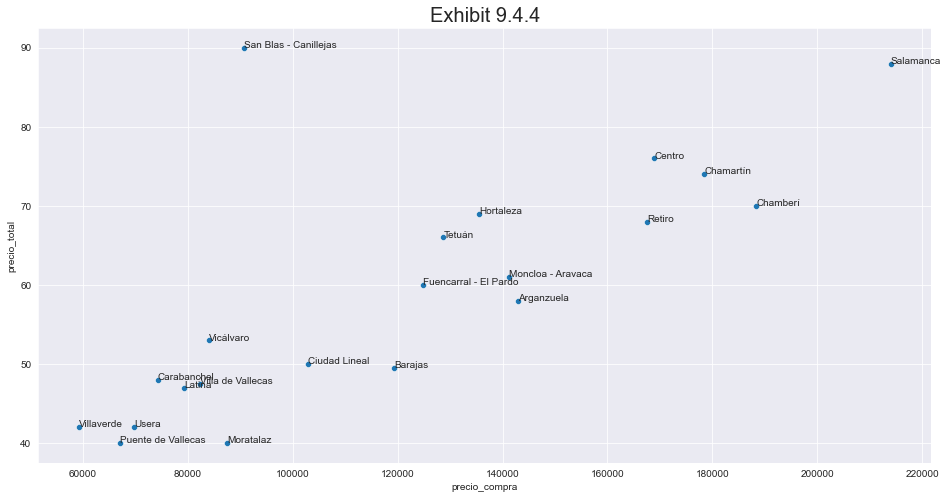

In [57]:
temp = df.groupby('distrito')[['precio_total','precio_compra']].median()

plt.figure(figsize = (16,8))
plt.title('Exhibit 9.4.4', fontsize = 20)
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

* Se puede apreciar que eventos deportivos o culturales generan un impacto económico en la zona

In [58]:
mapa = folium.Map(location = [40.4167278,-3.7033387], zoom_start = 12)

for piso in range(0, len(datos)):
    folium.CircleMarker(
            location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
            popup = datos.iloc[piso]['precio_total'],
            fill = True,
            color = datos.iloc[piso]['precio_total_disc'],
            fill_opacity = 0.4, 
            radius = 5).add_to(mapa)
    
mapa